In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

import warnings
warnings.filterwarnings(action='ignore')

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('./ex2data2.txt', header = None)
X = data.iloc[:, :-1]
y = data.iloc[:, 2]
data

,0,1,2
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


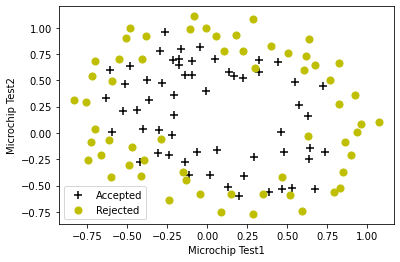

In [3]:
mask = y == 1
passed = plt.scatter(X[mask][0].values, X[mask][1].values, s=50, c='k', marker='+',)
failed = plt.scatter(X[~mask][0].values, X[~mask][1].values, s=50, c='y', marker='o',)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Accepted', 'Rejected'))
plt.show()

In [4]:
# def mapFeature(X1, X2, degree):
#     out = np.ones(X.shape[0])[:,np.newaxis]
#     for i in range(1, degree+1):
#         for j in range(i+1):
#             out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))[:,np.newaxis]))
#     return out

# degree = 6
# X = mapFeature(X.iloc[:,0], X.iloc[:,1], degree)
# X[0,:]

In [ ]:
tmp = []

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, kernel_regularizer=keras.regularizers.l2(0.01), 
                          activation='relu'),
    tf.keras.layers.Dense(2, kernel_regularizer=keras.regularizers.l2(0.01),
                          activation='relu'),
    tf.keras.layers.Dense(2, kernel_regularizer=keras.regularizers.l2(0.01),
                          activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
X.shape, y.shape

((118, 2), (118,))

In [7]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)

In [8]:
# print('X_train', X_train.shape)
# print('y_train', y_train.shape)

In [17]:
model.fit(X, y, batch_size=X.shape[0])

1/1 [==============================] - 0s 322ms/step - loss: 0.7516 - accuracy: 0.5085


In [88]:
# model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 141ms/step - loss: 6.7169 - accuracy: 0.5417


[6.716888427734375, 0.5416666865348816]

In [172]:
# pred = model.predict(X_test)
y = y[:, np.newaxis]

In [186]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

a = np.hstack([u[0], v[0]])
print(a)
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot()
        
mask = y.flatten() == 1
X = data.iloc[:,:-1]
passed = plt.scatter(X[mask][0].values, X[mask][1].values, s=50, c='k', marker='+',)
failed = plt.scatter(X[~mask][0].values, X[~mask][1].values, s=50, c='y', marker='o',)
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.title('$\lambda = 1$.')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

[-1. -1.]


ValueError: in user code:

    /Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/yangjaeug/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_18 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape (None, 1)
